# Chapter2: 데이터, 데이터, 또 데이터
## 캐글에서 받은 키-몸무게 데이터를 살펴보자!
### 여기서 살펴볼 내용
1. 두 변수간의 선형 의존성이 어떻게, 얼마나 직선처럼 보이는지 살펴볼 것이다.
2. 실제 데이터와 가상 데이터의 차이를 살펴볼 것이다.

### 1. [캐글 데이터셋](https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex) 불러오기 & 데이터 살펴보기
(1) 이 데이터셋의 키(컬럼명-Height)에 대한 체중(컬럼명-Weight)을 그래프로 그리면 분명 의존성 없이 무작위로 흩어진 점들로 보일 것이다. 데이터를 좀 더 꼼꼼히 살펴볼 필요가 있다. <br><br>
(2) 데이터셋을 탐색해보면 지수(컬럼명-Index) 3과 같은 과체중인 사람이 과장되었다는 사실을 알 수 있다.

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

    Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


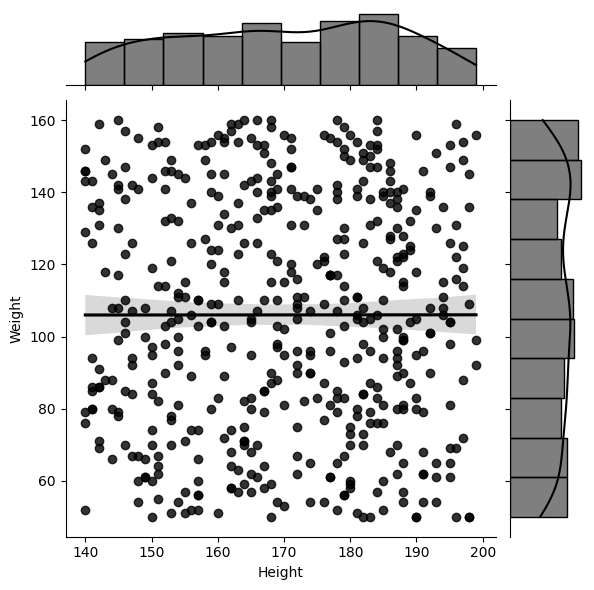

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_hw_biased = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
print(df_hw_biased.describe())
print('\n', df_hw_biased.head())

hw_plot = sns.jointplot(data=df_hw_biased, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_biased.png")

### 2. 지수 카테고리 컬럼에 따라 데이터를 분할한 후 각각의 분할 데이터셋에서 체중-키 그래프를 다시 그려보기
(1) 그래프를 그려 살펴보면, 체중은 키에 대해 선형적으로 종속된다는 것을 알 수 있다.


In [2]:
df_hw_biased['Index'].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

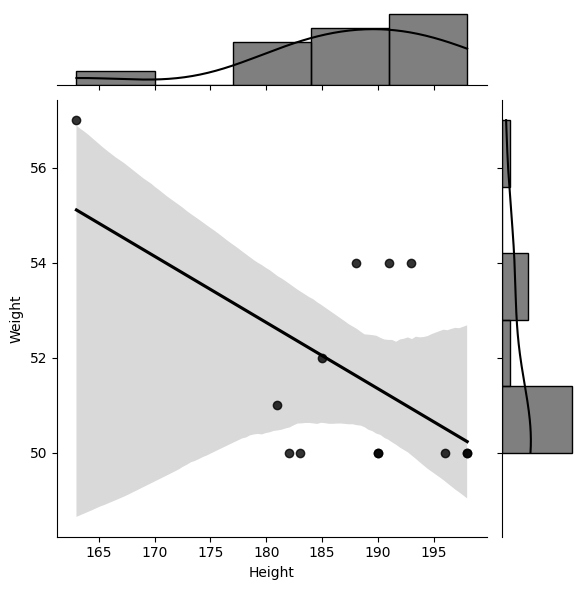

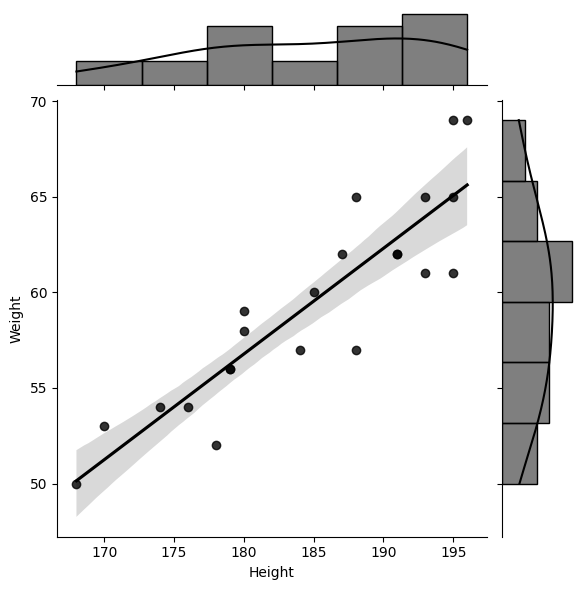

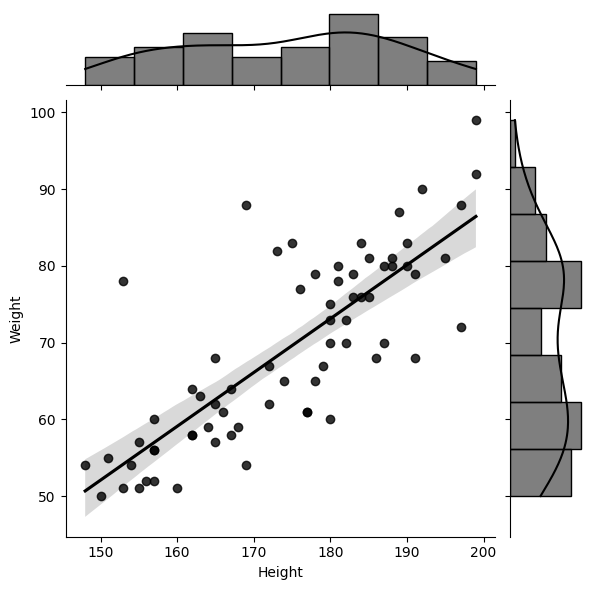

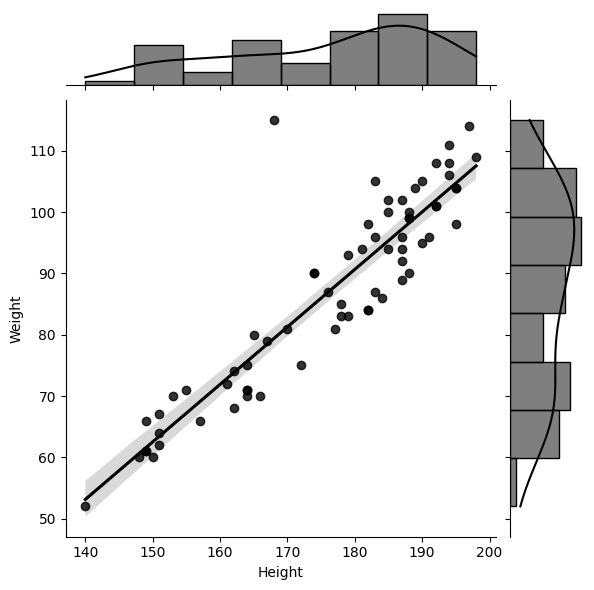

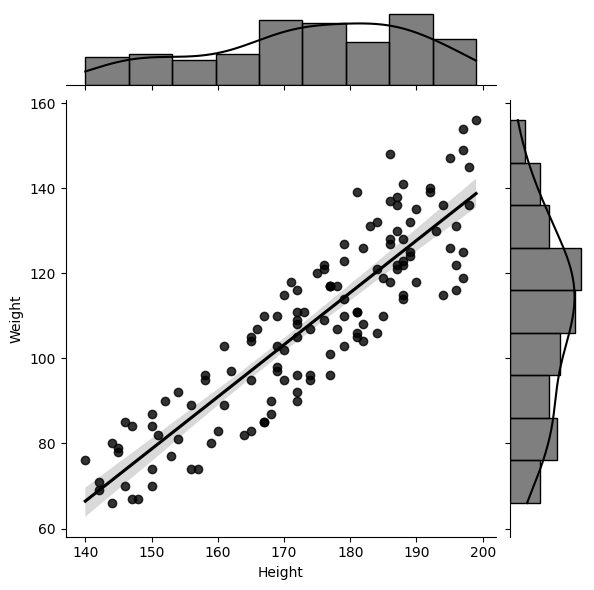

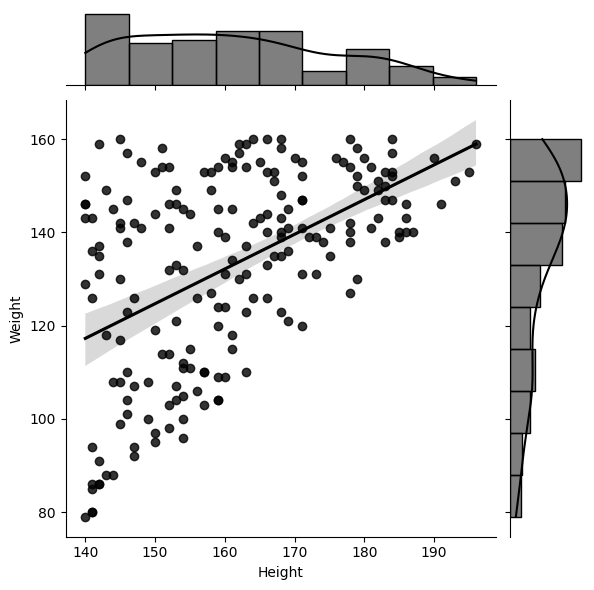

In [3]:
df_hw_biased_0 = df_hw_biased[df_hw_biased['Index']==0]
df_hw_biased_1 = df_hw_biased[df_hw_biased['Index']==1]
df_hw_biased_2 = df_hw_biased[df_hw_biased['Index']==2]
df_hw_biased_3 = df_hw_biased[df_hw_biased['Index']==3]
df_hw_biased_4 = df_hw_biased[df_hw_biased['Index']==4]
df_hw_biased_5 = df_hw_biased[df_hw_biased['Index']==5]

hw_plot=sns.jointplot(data=df_hw_biased_0, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_0.png")

hw_plot=sns.jointplot(data=df_hw_biased_1, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_1.png")

hw_plot=sns.jointplot(data=df_hw_biased_2, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_2.png")

hw_plot=sns.jointplot(data=df_hw_biased_3, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_3.png")

hw_plot=sns.jointplot(data=df_hw_biased_4, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_4.png")

hw_plot=sns.jointplot(data=df_hw_biased_5, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_5.png")


### 3. 좀 더 균형 잡힌 [캐글 데이터셋](https://www.kaggle.com/datasets/mustafaali96/weight-height)을 살펴보자.

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


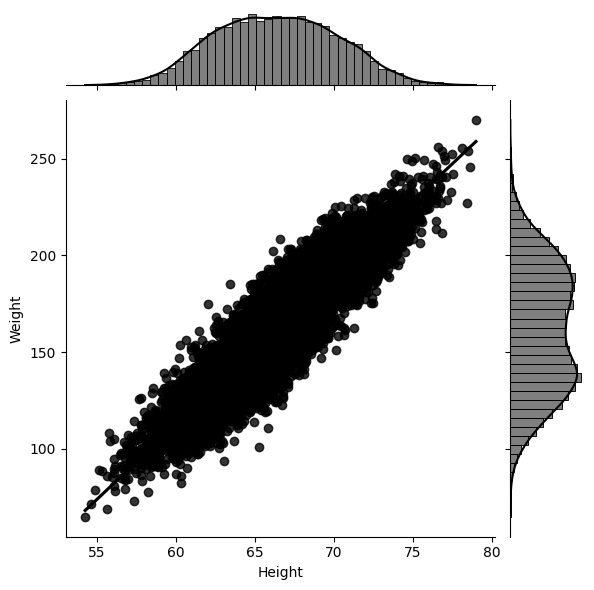

In [4]:
df = pd.read_csv('./data/weight-height.csv')

print(df.describe())
print('\n', df.head())

hw_plot=sns.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight.png")

### 4. 이번 데이터는 성별(Gender)로 데이터를 분할해보자.


 Male data description 
             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699

 
 Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


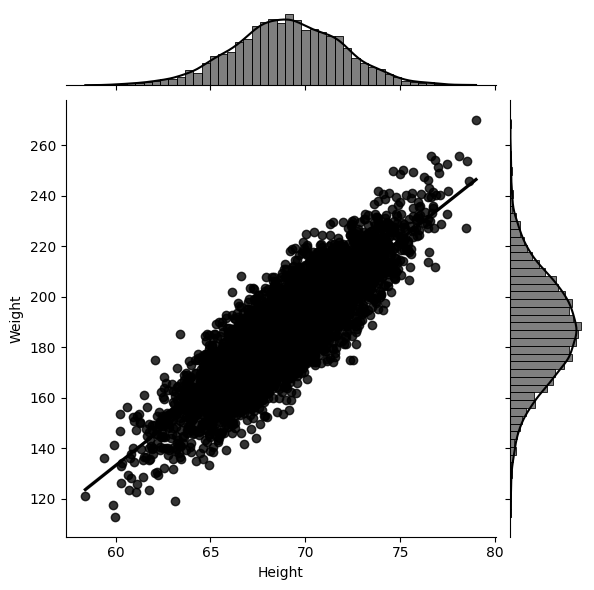

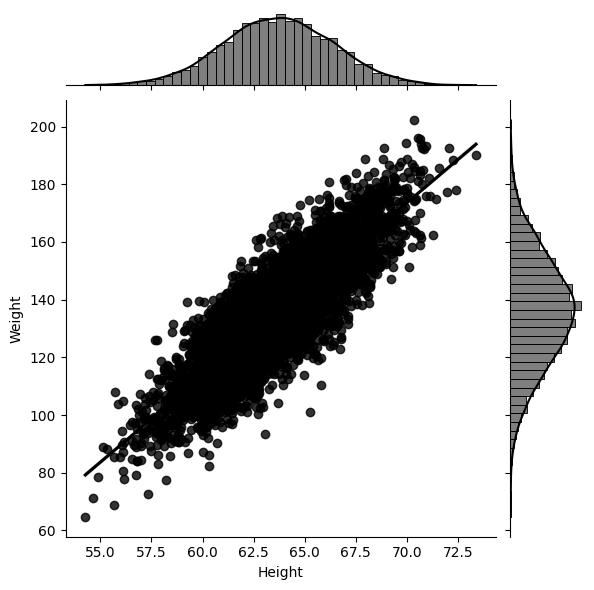

In [5]:
df_M=df[df['Gender']=='Male']
df_F=df[df['Gender']=='Female']

print('\n Male data description \n',df_M.describe())
M_plot=sns.jointplot(data=df_M, x='Height', y='Weight', kind='reg', color='k')
M_plot.savefig("./plots/Fig_height_weight_M.png")

print('\n \n Female data description \n',df_F.describe())
F_plot=sns.jointplot(data=df_F, x='Height', y='Weight', kind='reg', color='k')
F_plot.savefig("./plots/Fig_height_weight_F.png")

### 5. 이제 시뮬레이션을 해보자. 가상 데이터셋에서는 실제 데이터셋과 달리 가상 데이터셋을 생성하는 함수와 여기에 추가되는 랜덤 노이즈의 확률 분포를 알고 있다.

(1) 우리는 여기서 개인의 체중이 키에 선형적으로 종속된다는 가설을 세웠다. <br><br>

$$ weight = w_{0} + w_{1} \times height $$

(2) 이 때 우리는 가중치 $ w_{0}$, $w_{1}$ 의 값을 정해야 한다. 여기서는 실제 여성 몸무게 데이터와 유사한 데이터로 시뮬레이션 해보기 위해 $w_{0}=-314.5$, $w_{1}=7.07$ 로 하고, 정규 분포에서 샘플링한 노이즈를 추가한다.


 
 Simulated Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708426   135.920652
std       2.672151    18.980692
min      54.678343    72.526095
25%      61.907004   123.182911
50%      63.681608   135.690079
75%      65.540689   148.664534
max      73.494953   204.989128

 
 Female data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


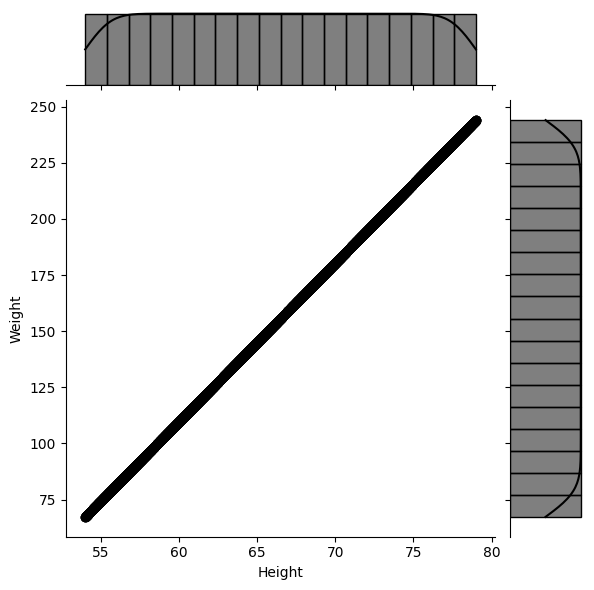

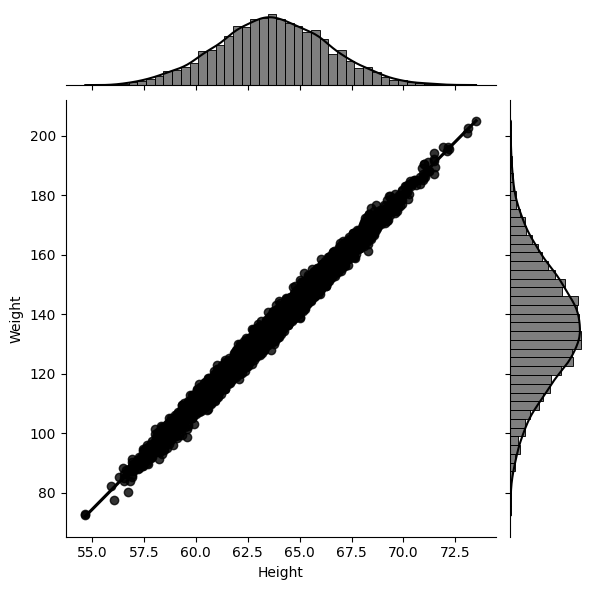

In [6]:
# 데이터 포인트의 갯수 N
N = 5000

# 선형 모델의 가중치 (매개변수) w0, w1
w0 = -314.5
w1 = 7.07

# 키 데이터 샘플과 키에 대한 선형 함수에 의해 생성된 몸무게
height = np.linspace(54, 79, N, endpoint=True)
weight = w0 + w1 * height


# 위에서 생성한 데이터를 활용해 데이터프레임을 만든다.
d = {'Height': height, 'Weight': weight}
df = pd.DataFrame(d)

# 그래프 그리기
hw_plot = sns.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')
hw_plot.savefig("./plots/Fig_height_weight_sim.png")

# 이제 키 데이터에 정규 분포를 따르는 노이즈를 추가한다. 이 때 정규 분포는 평균이 0, 표준편차가 2인 분포이다.
height_n = 2.69 * np.random.randn(N,) + 63.7

# 노이즈를 추가한 키 데이터에 대한 몸무게 데이터도 생성한다. 이 때도 똑같이 정규 분포를 따르는 노이즈를 추가한다.
weight_n = w0 + w1 * height_n + 2 * np.random.randn(N,)

# 위에서 생성한 데이터를 활용해 데이터프레임을 만든다.
d = {'Height':height_n,'Weight':weight_n}
hw_df_n=pd.DataFrame(d) 
print('\n \n Simulated Female data description \n',hw_df_n.describe())
print('\n \n Female data description \n',df_F.describe())

# 그래프 그리기
# plot the data points
hw_plot_n=sns.jointplot(data=hw_df_n, x='Height', y='Weight', kind='reg', color='k')
hw_plot_n.savefig("./plots/Fig_height_weight_sim_noise.png")